<a href="https://www.kaggle.com/code/jiwonkng/spaceship-titanic-eda-preprocessing-modeling?scriptVersionId=92775198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 프로젝트 개요
- 강의명 : 2022년 K-디지털 직업훈련(Training) 사업 - AI데이터플랫폼을 활용한 빅데이터 분석전문가 과정
- 교과목명 : 빅데이터 분석 및 시각화, AI개발 기초, 인공지능 프로그래밍
- 프로젝트 주제 : Spaceship Titanic 데이터를 활용한 탑승유무 분류모형 개발
- 프로젝트 마감일 : 2022년 4월 12일 화요일
- 수강생명 : 강지원

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Step 1. Library and Dataset

## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

print("Numpy ver.", np.__version__)
print("Pandas ver.", pd.__version__)
print("Matplotlib ver.", matplotlib.__version__)
print("Seaborn ver.", sns.__version__)

print(os.listdir('../input/spaceship-titanic/'))

Numpy ver. 1.20.3
Pandas ver. 1.3.5
Matplotlib ver. 3.5.1
Seaborn ver. 0.11.2
['sample_submission.csv', 'train.csv', 'test.csv']


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
BASE_DIR = '../input/spaceship-titanic/'
train = pd.read_csv(BASE_DIR + "train.csv")
test = pd.read_csv(BASE_DIR + "test.csv")
sample_submission = pd.read_csv(BASE_DIR + "sample_submission.csv")
print("Train Data:",train.shape)
print("Test Data:",test.shape)
print("Sample Data:",sample_submission.shape)

Train Data: (8693, 14)
Test Data: (4277, 13)
Sample Data: (4277, 2)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [8]:
test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


#### There are a total of 13 features, of which 6 are numerical variables.<br/>The target, the column we're going to predict, is 'Trasnported', which is a bool type variable

- For the detail descriptions, go to https://www.kaggle.com/competitions/spaceship-titanic/data

# Step 2. EDA

## Overview of Data

In [9]:
train.describe().T.style.background_gradient(cmap="Blues", axis=None,
                          vmin=0, vmax=100, high=0.5, text_color_threshold=0)\
                .bar(subset=["count"], color="lavender", vmin=8000, vmax=train.shape[0])\
                .bar(subset=["mean"], color="wheat", vmin=0)\
                .bar(subset=["std"], color="peachpuff", vmin=0)\
                .bar(subset=["max"], color="steelblue", vmin=0)

,count,mean,std,min,25%,50%,75%,max
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000


#### Except Age, more than half of each numeric variable is zero.
   - They are amount the passenger has billed at each of many amenities.
   - Preprocessing such as feature engineering and one-hot encoding is required.

In [10]:
train.describe(include=['O']).T.style.background_gradient()\
                .bar(subset=["count"], color="lavender", vmin=8000, vmax=train.shape[0])\
                .bar(subset=["unique"], color="sandybrown")

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


#### PassengerID, Cabin, and Name are text data, not categorical.
  - They don't seem to be important in themselves for model performance.
  - It is necessary to remove them or to be processed by feature engineering.

## Missing Value Distribution

In [11]:
train_miss = pd.DataFrame({
    'missing' : train.isnull().sum(),
    'ratio' : np.round(train.isnull().sum()/train.shape[0],4)*100
})
test_miss = pd.DataFrame({
    'missing' : test.isnull().sum(),
    'ratio' : np.round(test.isnull().sum()/test.shape[0],4)*100
})

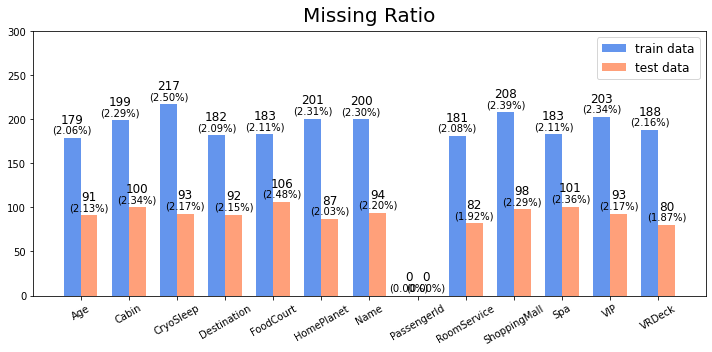

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

width = 0.35
x = np.arange(len(train.columns[:-1].to_list()))
x_ = sorted(test.columns.to_list())
y1 = train_miss['missing'][:-1].sort_index()
y1_ = train_miss['ratio'][:-1].sort_index()
y2 = test_miss['missing'].sort_index()
y2_ = test_miss['ratio'].sort_index()

bar1 = ax.bar(x-width/2, y1, width, label="train data", color="cornflowerblue")
bar2 = ax.bar(x+width/2, y2, width, label="test data", color="lightsalmon")
    
ax.set_xticks(x, x_, rotation=30)
ax.set_ylim(0,300)
ax.bar_label(bar1, padding=12, size=12)
ax.bar_label(bar2, padding=12, size=12)
ax.bar_label(bar1, labels=['(%.2f%%)' %y for y in y1_], padding=3, size=10)
ax.bar_label(bar2, labels=['(%.2f%%)' %y for y in y2_], padding=3, size=10)
ax.set_title("Missing Ratio", pad=10, size=20)
ax.legend(loc='best', fontsize=12)

fig.tight_layout()
plt.show()

#### The ratio of missing values by each feature is less than 3%.
- The numerical features will be replaced by the median value.
- The categorical features will be replaced by the most frequent value.

## Target Distribution

In [13]:
train_0 = train[train['Transported']==False]
train_1 = train[train['Transported']==True]

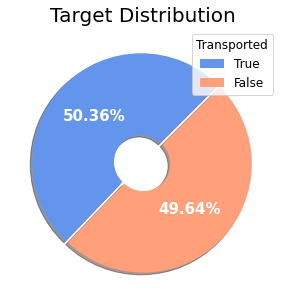

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

labels = train["Transported"].value_counts().index
lst = train["Transported"].value_counts().to_list()
pie = ax.pie(lst, labels = labels, autopct='%.2f%%',
             textprops=dict(color="white", fontsize=15, weight="bold"),
             colors=["cornflowerblue", "lightsalmon"], shadow=True,
             wedgeprops=dict(width=0.75), startangle=45, explode=(0.025,0))

ax.set_title("Target Distribution", size=20)
ax.legend(title="Transported", title_fontsize=12, loc='best', fontsize=12)

plt.show()

## Categorical Feature Distribution 

In [15]:
train_cat = train.select_dtypes(include = 'object')
test_cat = test.select_dtypes(include = 'object')
col_cat = train_cat.columns.to_list()
print(col_cat)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [16]:
def dist_cat(col_name):
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    width = 0.35
    x = train_cat.loc[:,col_name].value_counts().index
    bar1 = ax[0].bar(x, train_cat.loc[:,col_name].value_counts().to_list(),
                     width, label = "Train Data", color="cornflowerblue")
    bar2 = ax[0].bar(x, test_cat.loc[:,col_name].value_counts().to_list(),
                     width, label = "Test Data", color="lightsalmon")
    bar3 = ax[1].bar(np.arange(len(x)) - width/2,
                     train_1.loc[:,col_name].value_counts().to_list(),
                     width, label = "Target True", color="cornflowerblue")
    bar4 = ax[1].bar(np.arange(len(x)) + width/2,
                     train_0.loc[:,col_name].value_counts().to_list(),
                     width, label = "Target False", color="lightsalmon")
    
    ax[0].bar_label(bar1, size=12)
    ax[0].bar_label(bar2, size=12, color="w")
    ax[1].bar_label(bar3, size=12)
    ax[1].bar_label(bar4, size=12)
    
    ax[0].set_title(f'{col_name} Distribution',pad=10, size=15)
    ax[1].set_title(f'{col_name} by Target (Train Data)',pad=10, size=15)
    ax[0].set_xticks(x, x, size=12)
    ax[1].set_xticks(np.arange(len(x)), x, size=12)
    
    ax[0].legend(loc="best", fontsize=12)
    ax[1].legend(loc="best", fontsize=12)

    fig.tight_layout()
    return plt.show()

### --- HomePlanet ---

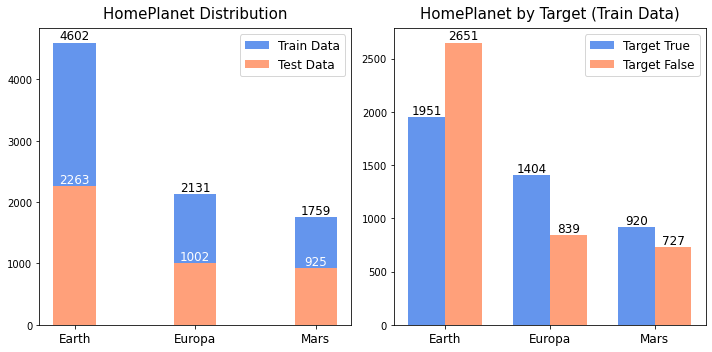

In [17]:
dist_cat('HomePlanet')

**3 categories (Earth, Europa, Mars)**  <br/> Earth account for more than half of both Train and Test.

- **Earth** : False in Transported is certainly high.
- **Europa** : True in Tranported is certainly high.
- **Mars** : True in Tranported is a little high, but there is not much difference.



### --- CryoSleep ---

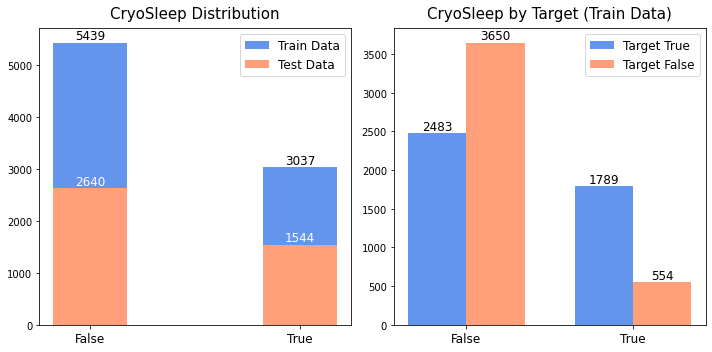

In [18]:
dist_cat('CryoSleep')

**Boolean (False / True)**  <br/> False is nearly twice as many as True of both Train and Test.

- **False** : False in Transported is certainly high.
- **True** : True in Tranported is more than three times.


### --- Destination ---

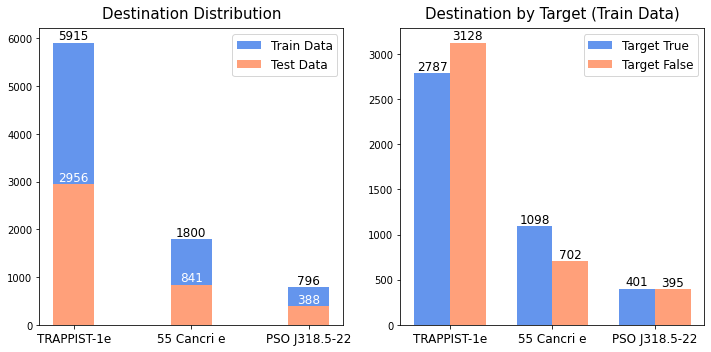

In [19]:
dist_cat('Destination')

**3 categories (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)** <br/> TRAPPIST-1e accounts for approximately 70 percent of both Train and Test.

- **TRAPPIST-1e** : False in Transported is a little high, but there is not much difference.
- **55 Cancri e** : True in Tranported is certainly high.<br/>
- **PSO J318.5-22** : Little difference in distribution by target.


### --- VIP ---

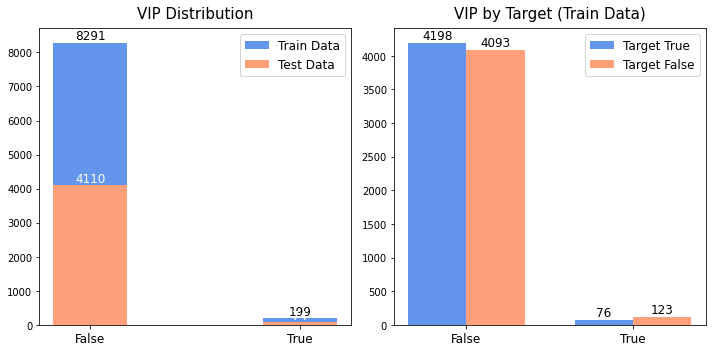

In [20]:
dist_cat('VIP')

**Boolean (False / True)**  <br/> False accounts for almost all data

- Little difference in distribution for the target variable, whether VIP is True or False.

## Numeric Feature Distribution

In [21]:
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_num = train.select_dtypes(include = numeric)
test_num = test.select_dtypes(include = numeric)
col_num = train_num.columns.to_list()
col_num

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

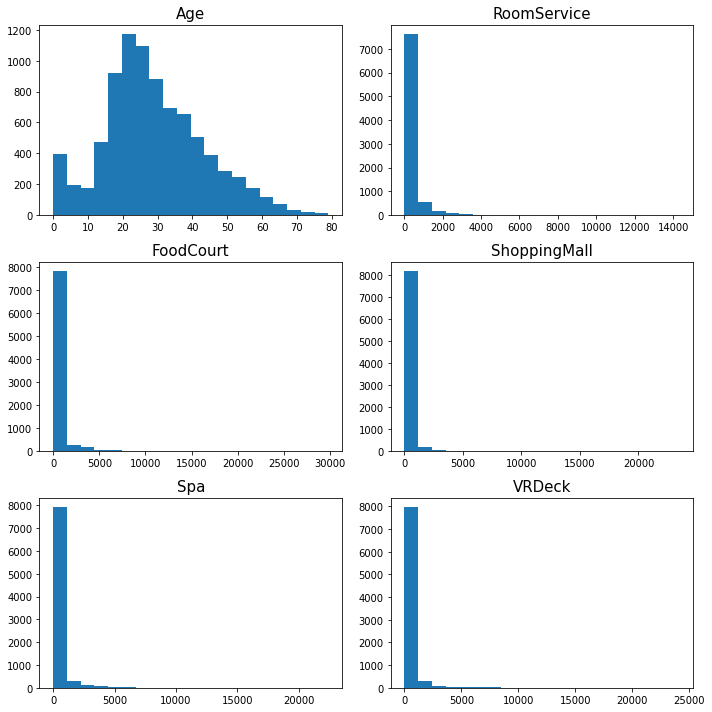

In [22]:
fig, ax = plt.subplots(3,2,figsize=(10,10))

for i in range(3):
    for j in range(2):
        ax[i, j].hist(train_num.iloc[:,2*i+j].tolist(), 20)
        ax[i, j].set_title(col_num[2*i+j], pad=7, size=15)

fig.tight_layout()
plt.show()

#### Except Age, all numeric features have a very unbalanced distribution.
- They seem necessary to convert variables such as encoding, scaling, and standardization.

## Feature Correlation

In [23]:
train.iloc[:,:-1].corr().style.background_gradient(
                        cmap="RdBu", axis=None, vmin=-0.5, vmax=0.5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


#### There seems to be little correlation between features.
- Issues such as multicollinearity don't have to be considered.

# Step 3. Data Preproccessing

## Feature engineering

### PassengerId
Each Id takes the form ***gggg_pp*** where ***gggg*** indicates a group the passenger is travelling with.<br/> So it seems necessary to create a derived variable for the group.
- **PassengerGroup** : Id of the group to which the passenger belongs
- **SizeOfGroup** : Number of people in the group to which the passenger belongs

In [24]:
# function that creates PassengerGroup and SizeOfGroup derived from PassengerId
def split_PassengerId(df):
    p_group = []
    for idx, row in df.iterrows():
        p_id = str(row['PassengerId'])
        if "_" in p_id:
            p_group.append(int(p_id.split("_")[0]))
        else:
            p_group.append(0)
    df['PassengerGroup'] = p_group
    df['SizeOfGroup'] = df.groupby('PassengerGroup')['PassengerId'].transform('nunique')
    return df
train = split_PassengerId(train)
test = split_PassengerId(test)

In [25]:
# function that creates table of value count in train and test set
def val_count(col_name):
    df = pd.DataFrame([train[col_name].value_counts(), test[col_name].value_counts()],
                      index=[[col_name, col_name],["train","test"]])
    return df

In [26]:
val_count('SizeOfGroup')

1     2     3    4    5    7    6    8
SizeOfGroup train  4805  1682  1020  412  265  231  174  104
            test   2340   908   486  204  115   98   78   48

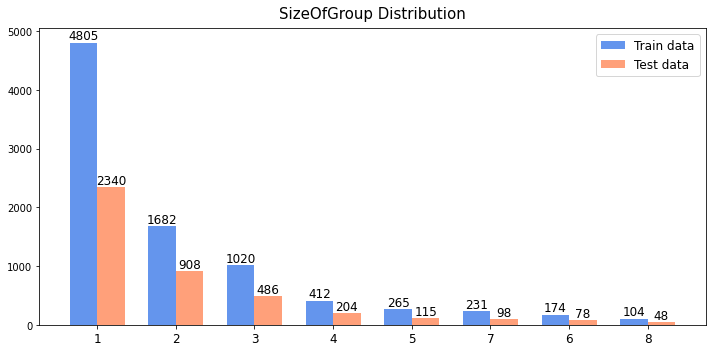

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

width = 0.35
x = train['SizeOfGroup'].value_counts().index
bar1 = ax.bar(np.arange(len(x)) - width/2,
                 train['SizeOfGroup'].value_counts().to_list(),
                 width, label = "Train data", color="cornflowerblue")
bar2 = ax.bar(np.arange(len(x)) + width/2,
                 test['SizeOfGroup'].value_counts().to_list(),
                 width, label = "Test data", color="lightsalmon")

ax.bar_label(bar1, size=12)
ax.bar_label(bar2, size=12)

ax.set_title('SizeOfGroup Distribution', pad=10, size=15)
ax.set_xticks(np.arange(len(x)), x, size=12)
ax.legend(loc="best", fontsize=12)

fig.tight_layout()
plt.show()

- **SizeOfGroup** has values from 1 to 8,<br/>and its distribution shows that **more than half of them are on board alone**.
- Therefore, it would be good to add a nominal derived variable "***InGroup***",<br/> which distinguishes whether the passenger is on board **in group(True)** or **alone(False)**.

In [28]:
# function that creates InGroup derived from SizeOfGroup
def create_InGroup(df):
    in_group = []
    for idx, row in df.iterrows():
        ig = row['SizeOfGroup']
        if ig==1:
            in_group.append("False")
        else:
            in_group.append("True")
    df['InGroup'] = in_group
    return df
train = create_InGroup(train)
test = create_InGroup(test)

In [29]:
val_count('InGroup')

False  True
InGroup train   4805  3888
        test    2340  1937

### Cabin
Each data takes the form ***deck/num/side***, where side can be either P for Port or S for Starboard.<br/> So it seems necessary to create a derived variable for the group.
- **CabinDeck** : Deck type of cabin which the passenger was boarded
- **CabinNum** : Number of cabin which the passenger was boarded
- **CabinSide** : P for Port or S for Starboard

In [30]:
# function that creates CabinDeck, CabinNum, CabinSide derived from Cabin
def split_Cabin(df):
    c_deck = []
    c_num = []
    c_side = []
    for idx, row in df.iterrows():
        cabin = str(row['Cabin'])
        if "/" in cabin:
            c_deck.append(cabin.split("/")[0])
            c_num.append(cabin.split("/")[1])
            c_side.append(cabin.split("/")[2])
        else:
            c_deck.append(None)
            c_num.append(-1)
            c_side.append(None)
    df['CabinDeck'] = c_deck
    df['CabinNum'] = c_num
    df['CabinSide'] = c_side
    return df
train = split_Cabin(train)
test = split_Cabin(test)

In [31]:
train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors='ignore')
test['CabinNum'] = pd.to_numeric(test['CabinNum'], errors='ignore')

In [32]:
val_count('CabinDeck')

F     G    E    B    C    D    A  T
CabinDeck train  2794  2559  876  779  747  478  256  5
          test   1445  1222  447  362  355  242   98  6

- **CabinDeck** has 8 types (A to F, and T).<br/>Among them, **Type T** seems to mean top deck, which  provides a better view than other decks.<br/>Maybe passengers on the top deck pay more, so Type T seems to be more valuable.
- But the number of type T is **very few**. I'm not going to make any more derivatives with CabinDeck.

In [33]:
val_count('CabinNum')

-1      0      1      2      3      4      5      6      7     \
CabinNum train  199.0   18.0   15.0   11.0   16.0    7.0   13.0   12.0    9.0   
         test   100.0    7.0    5.0    5.0    5.0   21.0    6.0    5.0   12.0   

                 8     ...   1884   1885   1886   1887   1888   1890   1891  \
CabinNum train   13.0  ...    1.0    NaN    1.0    NaN    2.0    NaN    1.0   
         test     5.0  ...    NaN    1.0    NaN    1.0    NaN    1.0    NaN   

                 1892   1893   1894  
CabinNum train    1.0    1.0    1.0  
         test     NaN    NaN    NaN  

[2 rows x 1895 columns]

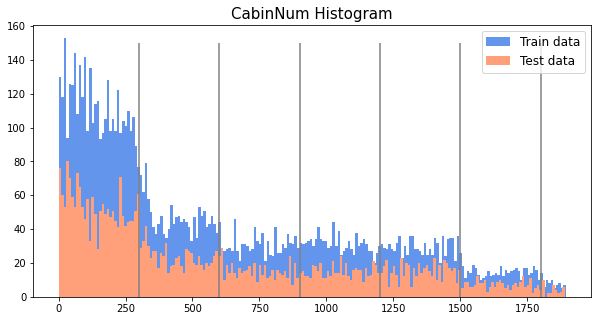

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

# histogram except for -1
ax.hist(train[train['CabinNum']!=-1]['CabinNum'], 200,
        color="cornflowerblue", label="Train data")
ax.hist(test[test['CabinNum']!=-1]['CabinNum'], 200,
        color="lightsalmon", label="Test data")
ax.set_title("CabinNum Histogram", size=15)
ax.legend(loc="best", fontsize=12)

ax.vlines([300,600,900,1200,1500,1800], ymin=0, ymax=150, color="gray")

plt.show()

- Except for -1, which is the imputation of missing values,<br/> **CabinNum** has values values greater than or equal to 0 and less than 2000. 
- CabinNum seems to be seperated into groups of 300 cabins.<br/> So, I will divide it into the groups and convert it to **categorical variable**.

In [35]:
'''
# function that create CabinGroup derived from CabinNum
def create_CabinGroup(df):
    c_group = []
    for idx, row in df.iterrows():
        cn = row['CabinNum']
        if cn==-1:
            c_group.append(None)
        elif cn < 300:
            c_group.append("group1")
        elif cn < 600:
            c_group.append("group2")
        elif cn < 900:
            c_group.append("group3")
        elif cn < 1200:
            c_group.append("group4")
        elif cn < 1500:
            c_group.append("group5")
        elif cn < 1800:
            c_group.append("group6")
        else:
            c_group.append("group7")
    df['CabinGroup'] = c_group
    return df
train = create_CabinGroup(train)
test = create_CabinGroup(test)
'''

'\n# function that create CabinGroup derived from CabinNum\ndef create_CabinGroup(df):\n    c_group = []\n    for idx, row in df.iterrows():\n        cn = row[\'CabinNum\']\n        if cn==-1:\n            c_group.append(None)\n        elif cn < 300:\n            c_group.append("group1")\n        elif cn < 600:\n            c_group.append("group2")\n        elif cn < 900:\n            c_group.append("group3")\n        elif cn < 1200:\n            c_group.append("group4")\n        elif cn < 1500:\n            c_group.append("group5")\n        elif cn < 1800:\n            c_group.append("group6")\n        else:\n            c_group.append("group7")\n    df[\'CabinGroup\'] = c_group\n    return df\ntrain = create_CabinGroup(train)\ntest = create_CabinGroup(test)\n'

In [36]:
'''
val_count('CabinGroup')
'''

"\nval_count('CabinGroup')\n"

In [37]:
'''
fig, ax = plt.subplots(figsize=(10,5))

width = 0.35
x = train['CabinGroup'].value_counts().index
bar1 = ax.bar(np.arange(len(x)) - width/2,
                 train['CabinGroup'].value_counts().to_list(),
                 width, label = "Train data", color="cornflowerblue")
bar2 = ax.bar(np.arange(len(x)) + width/2,
                 test['CabinGroup'].value_counts().to_list(),
                 width, label = "Test data", color="lightsalmon")

ax.bar_label(bar1, size=12)
ax.bar_label(bar2, size=12)

ax.set_title('CabinGroup Distribution', pad=10, size=15)
ax.set_xticks(np.arange(len(x)), x, size=12)
ax.legend(loc="best", fontsize=12)

fig.tight_layout()
plt.show()
'''

'\nfig, ax = plt.subplots(figsize=(10,5))\n\nwidth = 0.35\nx = train[\'CabinGroup\'].value_counts().index\nbar1 = ax.bar(np.arange(len(x)) - width/2,\n                 train[\'CabinGroup\'].value_counts().to_list(),\n                 width, label = "Train data", color="cornflowerblue")\nbar2 = ax.bar(np.arange(len(x)) + width/2,\n                 test[\'CabinGroup\'].value_counts().to_list(),\n                 width, label = "Test data", color="lightsalmon")\n\nax.bar_label(bar1, size=12)\nax.bar_label(bar2, size=12)\n\nax.set_title(\'CabinGroup Distribution\', pad=10, size=15)\nax.set_xticks(np.arange(len(x)), x, size=12)\nax.legend(loc="best", fontsize=12)\n\nfig.tight_layout()\nplt.show()\n'

In [38]:
val_count('CabinSide')

S     P
CabinSide train  4288  4206
          test   2093  2084

- **CabinSide** has 2 types (S: Starboard, P: Port), which is little difference in both train and test.

### Bill Distribution
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** is Amount the passenger has billed at each of the *Spaceship Titinic*'s many luxury amenities.
- So I will create a derived variable **TotalBill**, which is total of these variables.

In [39]:
col_bill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['TotalBill'] = train[col_bill].sum(axis=1)
test['TotalBill'] = test[col_bill].sum(axis=1)

pd.DataFrame({'train':train['TotalBill'], 'test':test['TotalBill']}).describe().T

,count,mean,std,min,25%,50%,75%,max
train,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0
test,4277.0,1417.682020,2816.402100,0.0,0.0,714.0,1444.0,33666.0


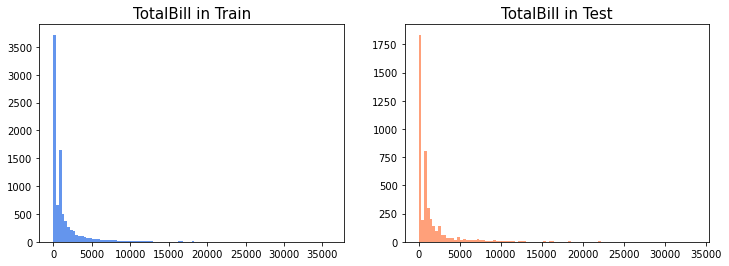

In [40]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

# TotalBill histogram
ax[0].hist(train['TotalBill'], 100,
        color="cornflowerblue", label="Train data")
ax[1].hist(test['TotalBill'], 100,
        color="lightsalmon", label="Test data")
ax[0].set_title("TotalBill in Train", size=15)
ax[1].set_title("TotalBill in Test", size=15)

plt.show()


- Still, it has a very unbalanced distribution and have a long right tail.
- Therefore, I will reduce the imbalance by applying log conversion to the data.

In [41]:
col_bill.append('TotalBill')
for col in col_bill:
    train[col] = np.log(1+train[col])
    test[col] = np.log(1+test[col])

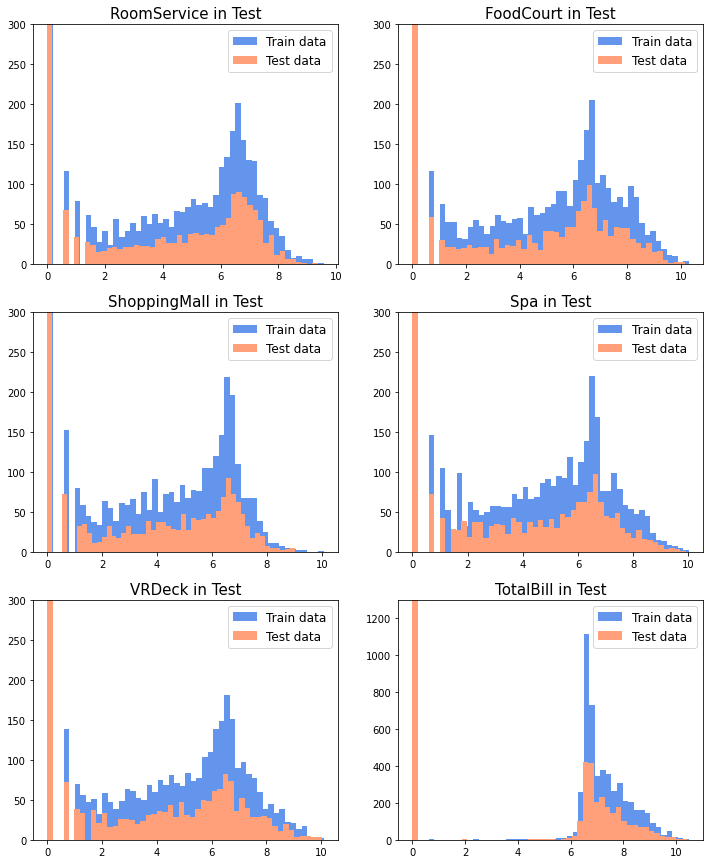

In [42]:
fig, ax = plt.subplots(3,2,figsize=(12,15))

for i in range(3):
    for j in range(2):
        ax[i,j].hist(train[col_bill[2*i+j]], 50,
                color="cornflowerblue", label="Train data")
        ax[i,j].hist(test[col_bill[2*i+j]], 50,
                color="lightsalmon", label="Test data")
        ax[i,j].set_title(f'{col_bill[2*i+j]} in Train', size=15)
        ax[i,j].set_title(f'{col_bill[2*i+j]} in Test', size=15)
        ax[i,j].set_ylim(0,300)
        ax[i,j].legend(loc='best', fontsize=12)
ax[2,1].set_ylim(0,1300)
plt.show()

- Although it shows an unbalanced distribution even after log conversion,<br/> it is expected to help improve model performance even a little.

In [43]:
'''
# function that creates PaidForAmenity derived from TotalBill
def create_PaidForAmenity(df):
    paid_lst = []
    for idx, row in df.iterrows():
        tot = row['TotalBill']
        if tot==0:
            paid_lst.append("False")
        else:
            paid_lst.append("True")
    df['PaidForAmenity'] = paid_lst
    return df
train = create_PaidForAmenity(train)
test = create_PaidForAmenity(test)
'''

'\n# function that creates PaidForAmenity derived from TotalBill\ndef create_PaidForAmenity(df):\n    paid_lst = []\n    for idx, row in df.iterrows():\n        tot = row[\'TotalBill\']\n        if tot==0:\n            paid_lst.append("False")\n        else:\n            paid_lst.append("True")\n    df[\'PaidForAmenity\'] = paid_lst\n    return df\ntrain = create_PaidForAmenity(train)\ntest = create_PaidForAmenity(test)\n'

In [44]:
'''
val_count('PaidForAmenity')
'''

"\nval_count('PaidForAmenity')\n"

## Missing Values
- Prior to the imputation of missing values,<br/>it is recommended to find out **the pattern of missing values** based on the relationship between variables.

### HomePlanet and PassengerGroup

In [45]:
# Calculate the number of HomePlanet for each PassengerGroup in Train data
hp_pg_train = pd.crosstab(train['PassengerGroup'], train['HomePlanet'])

cnt = []
for i in range(len(hp_pg_train)):
    cnt.append(np.sum(hp_pg_train.iloc[i,:] != 0))
hp_pg_train['count_planet'] = cnt
hp_pg_train.head(20).T

PassengerGroup,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,20,22,24,25
HomePlanet,,,,,,,,,,,,,,,,,,,,
Earth,0,1,0,1,1,2,1,0,0,1,1,1,0,1,0,2,6,0,0,1
Europa,1,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0
Mars,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
count_planet,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [46]:
# Calculate the number of HomePlanet for each PassengerGroup in Test data
hp_pg_test = pd.crosstab(test['PassengerGroup'], test['HomePlanet'])

cnt = []
for i in range(len(hp_pg_test)):
    cnt.append(np.sum(hp_pg_test.iloc[i,:] != 0))
hp_pg_test['count_planet'] = cnt
hp_pg_test.head(20).T

PassengerGroup,13,18,19,21,23,27,29,32,33,37,40,42,46,47,48,49,54,55,57,59
HomePlanet,,,,,,,,,,,,,,,,,,,,
Earth,1,1,0,0,1,1,0,0,1,1,0,0,3,0,1,1,0,1,0,1
Europa,0,0,1,1,0,0,1,2,0,0,2,0,0,3,0,0,3,0,1,0
Mars,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
count_planet,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


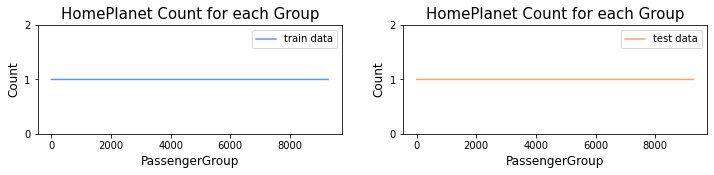

In [47]:
fig, ax = plt.subplots(1,2,figsize=(12,2))

ax[0].plot(hp_pg_train['count_planet'], color="cornflowerblue", label="train data")
ax[0].set_xlabel("PassengerGroup", size=12)
ax[0].set_ylabel("Count", size=12)
ax[0].set_yticks(range(3))
ax[0].set_title("HomePlanet Count for each Group", fontsize=15)

ax[1].plot(hp_pg_train['count_planet'], color="lightsalmon", label="test data")
ax[1].set_xlabel("PassengerGroup", size=12)
ax[1].set_ylabel("Count", size=12)
ax[1].set_yticks(range(3))
ax[1].set_title("HomePlanet Count for each Group", fontsize=15)

ax[0].legend()
ax[1].legend()

plt.show()

- According to the graph above, everyone in the same PassengerGroup comes from the same HomePlanet.<br/>So, **Homeplanet Missing values can be filled by groups**.

In [48]:
'''
print("Before :", train['HomePlanet'].isna().sum(), test['HomePlanet'].isna().sum())

# Index with missing HomePlanet and not missing PassengerGroup
hp_pg_train_idx = train[train['HomePlanet'].isna()][(train[train['HomePlanet'].isna()]['PassengerGroup']).isin(hp_pg_train.index)].index
hp_pg_test_idx = test[test['HomePlanet'].isna()][(test[test['HomePlanet'].isna()]['PassengerGroup']).isin(hp_pg_test.index)].index

# Fill corresponding missing values in HomePlanet
train.loc[hp_pg_train_idx, 'HomePlanet'] = train.iloc[hp_pg_train_idx,:]['PassengerGroup'].map(lambda x:hp_pg_train.idxmax(axis=1)[x])
test.loc[hp_pg_test_idx, 'HomePlanet'] = test.iloc[hp_pg_test_idx,:]['PassengerGroup'].map(lambda x:hp_pg_test.idxmax(axis=1)[x])

print("After :", train['HomePlanet'].isna().sum(), test['HomePlanet'].isna().sum())
'''

'\nprint("Before :", train[\'HomePlanet\'].isna().sum(), test[\'HomePlanet\'].isna().sum())\n\n# Index with missing HomePlanet and not missing PassengerGroup\nhp_pg_train_idx = train[train[\'HomePlanet\'].isna()][(train[train[\'HomePlanet\'].isna()][\'PassengerGroup\']).isin(hp_pg_train.index)].index\nhp_pg_test_idx = test[test[\'HomePlanet\'].isna()][(test[test[\'HomePlanet\'].isna()][\'PassengerGroup\']).isin(hp_pg_test.index)].index\n\n# Fill corresponding missing values in HomePlanet\ntrain.loc[hp_pg_train_idx, \'HomePlanet\'] = train.iloc[hp_pg_train_idx,:][\'PassengerGroup\'].map(lambda x:hp_pg_train.idxmax(axis=1)[x])\ntest.loc[hp_pg_test_idx, \'HomePlanet\'] = test.iloc[hp_pg_test_idx,:][\'PassengerGroup\'].map(lambda x:hp_pg_test.idxmax(axis=1)[x])\n\nprint("After :", train[\'HomePlanet\'].isna().sum(), test[\'HomePlanet\'].isna().sum())\n'

### HomePlanet and CabinDeck

In [49]:
# Calculate the number of HomePlanet for each CabinDeck in Train data
hp_cd_train = pd.crosstab(train['CabinDeck'], train['HomePlanet'])

cnt = []
for i in range(len(hp_cd_train)):
    cnt.append(np.sum(hp_cd_train.iloc[i,:] != 0))
hp_cd_train['count_planet'] = cnt
hp_cd_train.T

CabinDeck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0,0,0,0,395,1614,2498,0
Europa,252,766,734,186,128,0,0,4
Mars,0,0,0,282,330,1110,0,0
count_planet,1,1,1,2,3,2,1,1


In [50]:
# Calculate the number of HomePlanet for each CabinDeck in Test data
hp_cd_test = pd.crosstab(test['CabinDeck'], test['HomePlanet'])

cnt = []
for i in range(len(hp_cd_test)):
    cnt.append(np.sum(hp_cd_test.iloc[i,:] != 0))
hp_cd_test['count_planet'] = cnt
hp_cd_test.T

CabinDeck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0,0,0,0,188,812,1202,0
Europa,94,358,347,110,69,0,0,6
Mars,0,0,0,124,178,603,0,0
count_planet,1,1,1,2,3,2,1,1


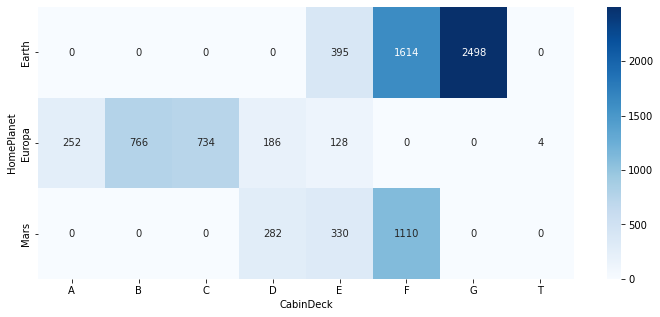

In [51]:
# Heatmap of Train data
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(hp_cd_train.iloc[:,:3].T, annot=True, fmt='g', cmap="Blues")
plt.show()

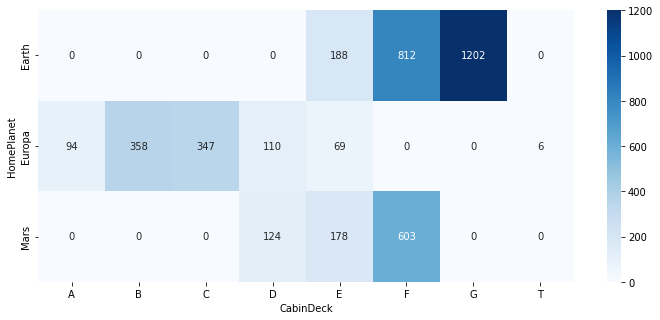

In [52]:
# Heatmap of Test data
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(hp_cd_test.iloc[:,:3].T, annot=True, fmt='g', cmap="Blues")
plt.show()

- CabinDeck **A, B, C, T** : From Europa
- CabinDeck **D, E, F** : From multiple planet
- CabinDeck **G** : From Earth

In [53]:
'''
print("Before :", train['HomePlanet'].isna().sum(), test['HomePlanet'].isna().sum())

# Missing HomePlanet and Deck A, B, C, T
train.loc[(train['HomePlanet'].isna()) & (train['CabinDeck'].isin(['A','B','C','T'])), 'HomePlanet']='Europa'
test.loc[(test['HomePlanet'].isna()) & (test['CabinDeck'].isin(['A','B','C','T'])), 'HomePlanet']='Europa'

# Missing HomePlanet and Deck G
train.loc[(train['HomePlanet'].isna()) & (train['CabinDeck']=='G'), 'HomePlanet']='Europa'
test.loc[(test['HomePlanet'].isna()) & (test['CabinDeck']=='G'), 'HomePlanet']='Earth'

print("After :", train['HomePlanet'].isna().sum(), test['HomePlanet'].isna().sum())
'''

'\nprint("Before :", train[\'HomePlanet\'].isna().sum(), test[\'HomePlanet\'].isna().sum())\n\n# Missing HomePlanet and Deck A, B, C, T\ntrain.loc[(train[\'HomePlanet\'].isna()) & (train[\'CabinDeck\'].isin([\'A\',\'B\',\'C\',\'T\'])), \'HomePlanet\']=\'Europa\'\ntest.loc[(test[\'HomePlanet\'].isna()) & (test[\'CabinDeck\'].isin([\'A\',\'B\',\'C\',\'T\'])), \'HomePlanet\']=\'Europa\'\n\n# Missing HomePlanet and Deck G\ntrain.loc[(train[\'HomePlanet\'].isna()) & (train[\'CabinDeck\']==\'G\'), \'HomePlanet\']=\'Europa\'\ntest.loc[(test[\'HomePlanet\'].isna()) & (test[\'CabinDeck\']==\'G\'), \'HomePlanet\']=\'Earth\'\n\nprint("After :", train[\'HomePlanet\'].isna().sum(), test[\'HomePlanet\'].isna().sum())\n'

### Cabin and PassengerGroup

In [54]:
# Calculate the number of Cabin Features for each PassengerGroup in Train data
cd_pg_train = pd.crosstab(train[train['SizeOfGroup']>1]['PassengerGroup'],
                          train[train['SizeOfGroup']>1]['CabinDeck'])
cn_pg_train = pd.crosstab(train[train['SizeOfGroup']>1]['PassengerGroup'],
                          train[train['SizeOfGroup']>1]['CabinNum'])
cs_pg_train = pd.crosstab(train[train['SizeOfGroup']>1]['PassengerGroup'],
                          train[train['SizeOfGroup']>1]['CabinSide'])

cnt1 = []
cnt2 = []
cnt3 = []
for i in range(len(cd_pg_train)):
    cnt1.append(np.sum(cd_pg_train.iloc[i,:] != 0))
    cnt2.append(np.sum(cn_pg_train.iloc[i,:] != 0))
    cnt3.append(np.sum(cs_pg_train.iloc[i,:] != 0))

cd_pg_train['count_deck'] = cnt1
cn_pg_train['count_num'] = cnt2
cs_pg_train['count_side'] = cnt3

print(cd_pg_train.head(10).T, "\n")
print(cn_pg_train.head(10).T, "\n")
print(cs_pg_train.head(10).T)

PassengerGroup  3   6   8   17  20  31  44  45  56  64
CabinDeck                                             
A                2   0   0   0   0   0   0   0   3   0
B                0   0   3   0   0   0   0   0   0   0
C                0   0   0   0   0   0   0   0   0   0
D                0   0   0   0   0   0   0   0   0   0
E                0   0   0   0   6   0   0   0   0   1
F                0   1   0   1   0   3   0   2   0   1
G                0   1   0   1   0   0   3   0   0   0
count_deck       1   2   1   2   1   1   1   1   1   2 

PassengerGroup  3   6   8   17  20  31  44  45  56  64
CabinNum                                              
-1               0   0   0   0   0   0   0   0   0   0
0                2   1   0   1   6   0   0   0   0   0
1                0   0   3   0   0   0   0   0   3   0
2                0   1   0   0   0   0   0   0   0   0
3                0   0   0   0   0   0   3   0   0   1
...             ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
1871    

In [55]:
# Calculate the number of Cabin Features for each PassengerGroup in Test data
cd_pg_test = pd.crosstab(test[test['SizeOfGroup']>1]['PassengerGroup'],
                          test[test['SizeOfGroup']>1]['CabinDeck'])
cn_pg_test = pd.crosstab(test[test['SizeOfGroup']>1]['PassengerGroup'],
                          test[test['SizeOfGroup']>1]['CabinNum'])
cn_pg_test = cn_pg_test.drop(9223,axis=0)
cs_pg_test = pd.crosstab(test[test['SizeOfGroup']>1]['PassengerGroup'],
                          test[test['SizeOfGroup']>1]['CabinSide'])

cnt1 = []
cnt2 = []
cnt3 = []
for i in range(len(cd_pg_test)):
    cnt1.append(np.sum(cd_pg_test.iloc[i,:] != 0))
    cnt2.append(np.sum(cn_pg_test.iloc[i,:] != 0))
    cnt3.append(np.sum(cs_pg_test.iloc[i,:] != 0))

cd_pg_test['count_deck'] = cnt1
cn_pg_test['count_num'] = cnt2
cs_pg_test['count_side'] = cnt3

print(cd_pg_test.head(10).T, "\n")
print(cn_pg_test.head(10).T, "\n")
print(cs_pg_test.head(10).T)

PassengerGroup  32   40   46   47   54   94   100  125  142  150
CabinDeck                                                       
A                 0    0    0    0    0    0    0    0    0    0
B                 0    0    0    2    3    0    0    2    0    2
C                 0    0    0    0    0    0    0    0    0    0
D                 2    2    0    0    0    0    0    0    0    0
E                 0    0    0    0    0    0    0    0    0    0
F                 0    0    2    0    0    1    0    0    3    0
G                 0    0    1    0    0    1    2    0    0    0
T                 0    0    0    0    0    0    0    0    0    0
count_deck        1    1    2    1    1    2    1    1    1    1 

PassengerGroup  32   40   46   47   54   94   100  125  142  150
CabinNum                                                        
-1                0    0    0    1    0    0    0    0    0    0
0                 2    0    0    2    0    0    0    0    0    0
2                 0    

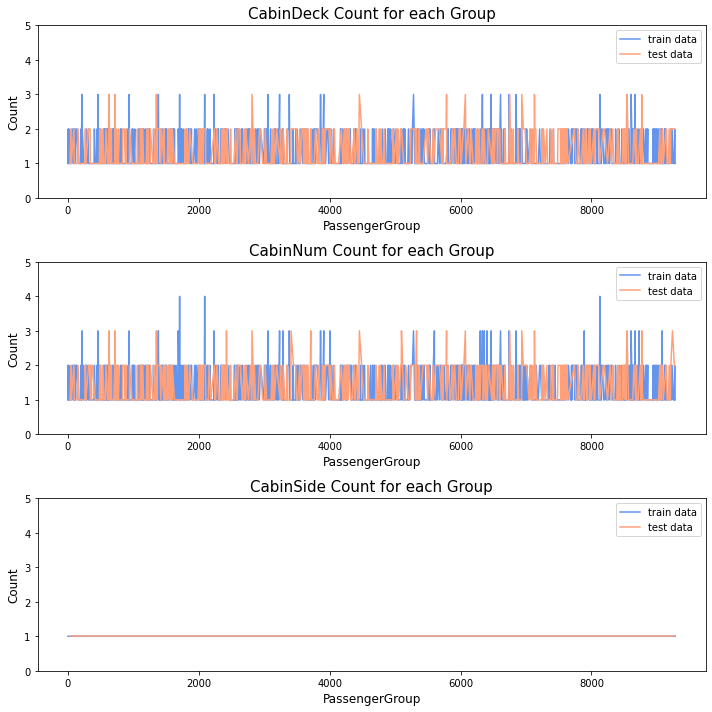

In [56]:
fig, ax = plt.subplots(3,1,figsize=(10,10))

ax[0].plot(cd_pg_train['count_deck'], color="cornflowerblue", label="train data")
ax[0].plot(cd_pg_test['count_deck'], color="lightsalmon", label="test data")

ax[1].plot(cn_pg_train['count_num'], color="cornflowerblue", label="train data")
ax[1].plot(cn_pg_test['count_num'], color="lightsalmon", label="test data")

ax[2].plot(cs_pg_train['count_side'], color="cornflowerblue", label="train data")
ax[2].plot(cs_pg_test['count_side'], color="lightsalmon", label="test data")

for i in range(3):
    ax[i].set_xlabel("PassengerGroup", size=12)
    ax[i].set_ylabel("Count", size=12)
    ax[i].set_yticks(range(6))
    ax[i].legend(loc="upper right")

ax[0].set_title("CabinDeck Count for each Group", pad=7, fontsize=15)
ax[1].set_title("CabinNum Count for each Group", pad=7, fontsize=15)
ax[2].set_title("CabinSide Count for each Group", pad=7, fontsize=15)

fig.tight_layout()
plt.show()

- For CabinDeck and CabinNum,<br/>there is a fairly good correlation with PassengerGroup, but not perfect.
- Everyone in the same PassengerGroup is on the perfectly same CabinSide.<br/>So, **CabinSide Missing values can be filled by groups**.

In [57]:
'''
print("Before :", train['CabinSide'].isna().sum(), test['CabinSide'].isna().sum())

# Index with missing HomePlanet and not missing PassengerGroup
cs_pg_train_idx = train[train['CabinSide'].isna()][(train[train['CabinSide'].isna()]['PassengerGroup']).isin(cs_pg_train.index)].index
cs_pg_test_idx = test[test['CabinSide'].isna()][(test[test['CabinSide'].isna()]['PassengerGroup']).isin(cs_pg_test.index)].index

# Fill corresponding missing values in HomePlanet
train.loc[cs_pg_train_idx, 'CabinSide'] = train.iloc[cs_pg_train_idx,:]['PassengerGroup'].map(lambda x:cs_pg_train.idxmax(axis=1)[x])
test.loc[cs_pg_test_idx, 'CabinSide'] = test.iloc[cs_pg_test_idx,:]['PassengerGroup'].map(lambda x:cs_pg_test.idxmax(axis=1)[x])

print("After :", train['CabinSide'].isna().sum(), test['CabinSide'].isna().sum())
'''

'\nprint("Before :", train[\'CabinSide\'].isna().sum(), test[\'CabinSide\'].isna().sum())\n\n# Index with missing HomePlanet and not missing PassengerGroup\ncs_pg_train_idx = train[train[\'CabinSide\'].isna()][(train[train[\'CabinSide\'].isna()][\'PassengerGroup\']).isin(cs_pg_train.index)].index\ncs_pg_test_idx = test[test[\'CabinSide\'].isna()][(test[test[\'CabinSide\'].isna()][\'PassengerGroup\']).isin(cs_pg_test.index)].index\n\n# Fill corresponding missing values in HomePlanet\ntrain.loc[cs_pg_train_idx, \'CabinSide\'] = train.iloc[cs_pg_train_idx,:][\'PassengerGroup\'].map(lambda x:cs_pg_train.idxmax(axis=1)[x])\ntest.loc[cs_pg_test_idx, \'CabinSide\'] = test.iloc[cs_pg_test_idx,:][\'PassengerGroup\'].map(lambda x:cs_pg_test.idxmax(axis=1)[x])\n\nprint("After :", train[\'CabinSide\'].isna().sum(), test[\'CabinSide\'].isna().sum())\n'

### CryoSleep and TotalBill
- Passengers in a CryoSleep state cannot pay for anything.<br/>Therefore, it is necessary to check the correlation between **CryoSleep and TotalBill**.

In [58]:
# correlation between CryoSleep and TotalBill
train['NoSpend'] = (train['TotalBill']==0).astype(int)
test['NoSpend'] = (test['TotalBill']==0).astype(int)
cr_ns_train = pd.crosstab(train['CryoSleep'], train['NoSpend'])
cr_ns_test = pd.crosstab(test['CryoSleep'], test['NoSpend'])

cr_ns_train

NoSpend,0,1
CryoSleep,,
False,4921,518
True,0,3037


In [59]:
cr_ns_test

NoSpend,0,1
CryoSleep,,
False,2418,222
True,0,1544


- According to data above, everyone in a CryoSleep state doesn't pay for anything.<br/>Therefore, **Missing CryoSleep can be partly filled by NoSpend**

In [60]:
print("Before :", train['CryoSleep'].isna().sum(), test['CryoSleep'].isna().sum())

cr_ns_train_idx = train.loc[train['CryoSleep'].isna(),'CryoSleep'].index
cr_ns_test_idx = test.loc[test['CryoSleep'].isna(),'CryoSleep'].index
train.loc[train['CryoSleep'].isna(),'CryoSleep'] = train.groupby(['NoSpend'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[cr_ns_train_idx]
test.loc[test['CryoSleep'].isna(),'CryoSleep'] = test.groupby(['NoSpend'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[cr_ns_test_idx]

print("After :", train['CryoSleep'].isna().sum(), test['CryoSleep'].isna().sum())

Before : 217 93
After : 0 0


- In addition, every bill feature of CryoSleep passengers have to be filled 0

In [61]:
print("Before---")
for col in col_bill:
    print(f'{col} :', train[col].isna().sum(), test[col].isna().sum())
    train.loc[(train[col].isna()) & (train['CryoSleep']==True), col]=0
    test.loc[(test[col].isna()) & (test['CryoSleep']==True), col]=0
    
print("\nAfter---")
for col in col_bill:
    print(f'{col} :', train[col].isna().sum(), test[col].isna().sum())

Before---
RoomService : 181 82
FoodCourt : 183 106
ShoppingMall : 208 98
Spa : 183 101
VRDeck : 188 80
TotalBill : 0 0

After---
RoomService : 113 57
FoodCourt : 112 67
ShoppingMall : 109 63
Spa : 116 57
VRDeck : 121 51
TotalBill : 0 0


## Removal of unnecessary variables
- Remove variables that will not be used in the model.
     + PassengerId, Cabin, Name, PassengerGroup, SizeOfGroup, CabinNum

In [62]:
remove_cols = ['PassengerId', 'Cabin', 'Name',
               'PassengerGroup', 'SizeOfGroup', 'TotalBill', 'NoSpend']

print("Before Removal")
print("\tTrain data:", train.shape, "/ Test data:", test.shape)
train_data = train.drop(remove_cols, axis=1)
test_data = test.drop(remove_cols, axis=1)

print("After Removal")
print("\tTrain data:", train_data.shape, "/ Test data:", test_data.shape)

Before Removal
	Train data: (8693, 22) / Test data: (4277, 21)
After Removal
	Train data: (8693, 15) / Test data: (4277, 14)


## Preprocessing Pipeline
### Imputing Missing Values
- The numerical features will be replaced by the median value.
- The categorical features will be replaced by the most frequent value.

### Numeric Feature Scailing
- Age does not require scaling.
- Robustscaler is better suited to reduce the impact of extreme values.

### Categorical Feature Encoding
- Ordinal Feature - Ordinal Encoding / Nominal Feature - Onehot Encoding
- The categorical features in this model are all nominal.

In [63]:
num_feature = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
               'Spa', 'VRDeck', 'CabinNum']
cat_feature = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
               'InGroup', 'CabinDeck', 'CabinSide']
# ord_feature = ['CabinGroup']

In [64]:
y = train_data['Transported'].copy().astype(int)
X = train_data.drop('Transported', axis=1).copy()
X_test = test_data.copy()

In [65]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='median')),
       ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),
       ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))
])

'''
ordinal_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),
       ('ordinal', OrdinalEncoder())
])
'''

preprocessor = ColumnTransformer(
   transformers=[
     ('num', numeric_transformer, num_feature),
     ('cat', categorical_transformer, cat_feature),
    # ('ord', ordinal_transformer, ord_feature)
   ], remainder='passthrough')

X = preprocessor.fit_transform(X)
X_test = preprocessor.transform(X_test)

# Step 4. ML Model

## Data Split
#### Split train data and validation data

In [66]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42)
print("Train data\t:", X_train.shape, y_train.shape)
print("Validation data\t:", X_val.shape, y_val.shape)

Train data	: (6085, 28) (6085,)
Validation data	: (2608, 28) (2608,)


## Model Selection
#### Apply grid search to select the best model and hyperparameters

In [67]:
# define classifier
classifiers = {
    "KNN" : KNeighborsClassifier(),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42)
}

# define grid
KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

RF_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 6, 8, 10, 12]}

LGBM_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 6, 8, 10, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

grid = {
    "KNN" : KNN_grid,
    "LogisticRegression" : LR_grid,
    "RandomForest" : RF_grid,
    "LGBM" : LGBM_grid
}

In [68]:
i=0
clf_best_params = classifiers.copy()
scores = pd.DataFrame({
                    'Classifer':classifiers.keys(),
                    'Train accuracy' : np.zeros(len(classifiers)),
                    'Validation accuracy': np.zeros(len(classifiers)),
                    'Training time': np.zeros(len(classifiers))
                    })

for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    clf.fit(X_train, y_train)
    scores.iloc[i,1]=clf.score(X_train, y_train)
    scores.iloc[i,2]=clf.score(X_val, y_val)
    clf_best_params[key]=clf.best_params_
    
    stop = time.time()
    scores.iloc[i,3]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', scores.iloc[i,3])
    print('')
    i+=1

Model: KNN
Training time (mins): 0.12



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: LogisticRegression
Training time (mins): 0.03

Model: RandomForest
Training time (mins): 0.37

Model: LGBM
Training time (mins): 0.39



In [69]:
# best parameters from grid search
clf_best_params

{'KNN': {'n_neighbors': 9, 'p': 1},
 'LogisticRegression': {'C': 0.25, 'max_iter': 50, 'penalty': 'l2'},
 'RandomForest': {'max_depth': 12, 'n_estimators': 150},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}}

In [70]:
scores

,Classifer,Train accuracy,Validation accuracy,Training time
0,KNN,0.824815,0.769172,0.12
1,LogisticRegression,0.782744,0.768021,0.03
2,RandomForest,0.921775,0.796779,0.37
3,LGBM,0.844700,0.800997,0.39


#### **RandomForest** and **LGBM** is suitable<br/> because they are better in terms of validation accuracy.

# Step 5. Model Evaluation

## 10-fold Cross Validation

In [71]:
models = {
    "RandomForest" :
    RandomForestClassifier(**clf_best_params['RandomForest'], random_state=42),
    "LGBM" :
    LGBMClassifier(**clf_best_params["LGBM"], random_state=42)
    }

In [72]:
FOLDS=10
val_preds=np.zeros(len(X_val))
test_preds=np.zeros(len(X_test))

for key, classifier in models.items():
    start = time.time()
    
    score=0
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        clf = classifier
        clf.fit(X_train, y_train)
        
        val_preds += clf.predict_proba(X_val)[:,1]
        test_preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    score /= FOLDS
    stop = time.time()

    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')

Model: RandomForest
Average validation accuracy: 80.48
Training time (mins): 0.23

Model: LGBM
Average validation accuracy: 81.01
Training time (mins): 0.03



## Ensemble predictions

In [73]:
val_preds /= (FOLDS*len(models))
test_preds /= (FOLDS*len(models))
val_preds = np.round(val_preds).astype(bool)
test_preds = np.round(test_preds).astype(bool)

## Confusion Matrix and ROC curve
: Table the relationship between the predicted value and the real value<br/>
- **accuracy** : (TP+TN) / (TP+TN+FP+FN)<br/>
- **precision** : TP / (TP+ FP)<br/>
- **recall**(**sensitivity**) : TP / (TP+FN)<br/>
- **f1 score** : 2 * precision * recall / (precision + recall)

In [74]:
conf = pd.DataFrame(confusion_matrix(y_val, val_preds),
                    index = [["actual", "actual"], ["N", "P"]],
                    columns = [["pred", "pred"], ["N", "P"]])
conf

pred      
             N     P
actual N  1094   195
       P   160  1159

In [75]:
print("accuracy =", accuracy_score(y_val, val_preds))
print("precision =", precision_score(y_val, val_preds))
print("recall =", recall_score(y_val, val_preds))

accuracy = 0.8638803680981595
precision = 0.8559822747415067
recall = 0.8786959818043972


AUC score: 0.8637079598703911


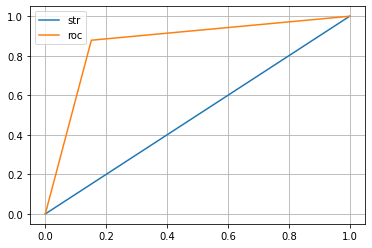

In [76]:
fprs, tprs, thresholds = roc_curve(y_val, val_preds)
print("AUC score:", roc_auc_score(y_val, val_preds))

fig, ax = plt.subplots()
ax.plot([0,1],[0,1],label='str')
ax.plot(fprs, tprs, label='roc')
ax.legend()
ax.grid()
plt.show()

# Step 6. Submission

In [77]:
sample_submission['Transported'] = test_preds
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [78]:
sample_submission.to_csv('submission.csv', index=False)

# ** Reference
- https://www.kaggle.com/code/odins0n/spaceship-titanic-eda-27-different-models
- https://www.kaggle.com/code/taranmarley/feature-engineering-eda-and-lightgbm
- https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide

# ** Score List
- Submit 1 (22.04.04) : acc = **0.78840** (795/1150)
    > select LGBM
- Submit 2 (22.04.06) : acc = **0.79284** (697/1198)
    > apply Grid search and ensemble RandomForest, LGBM
- Submit 3 (22.04.07) : acc = **0.80336** (252/1198)
    > create derived variables(SizeOfGroup, CabinDect, CabinNum, CabinSide)
- Submit 4 (22.04.09) : acc = **0.80593** (145/1270)
    > create derived variables(InGroup)
- Submit 5 (22.04.12) : acc = **0.80640** (141/1363)
    > impute missing values(CryoSleep, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)